In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def saturation_temperature(pressure):
    pvc = [-51.574, 0.20636, -0.29381e-3, 0.2231e-6, -0.86184e-10, 1.3299e-14]
    tlo = 400.0
    thi = 1800.0
    for j in range(100):
        temp = (tlo+thi)/2.0
        pv = pvc[5]
        for i in range(4,-1,-1):
            pv = temp*pv + pvc[i]
        pv = 10.0*math.exp(pv)  
        #print(j,temp,pv,pressure)
        if (abs(pv-pressure) < 0.001):
            break
        if (pv < pressure):
            tlo = temp
        else:
            thi = temp
    return temp

In [3]:
def fmax(fmx,spec_heat_ratio, inlet_mach):
    phi = (.3403/fmx**0.255)**2
    if (inlet_mach > 1.0):
        phi = (1.0286*math.exp(2.4938*fmx))**2
    for i in range(50):
        checkval = (spec_heat_ratio+1.0)*phi/2./(1.0+(spec_heat_ratio-1.0)/2.*phi)
        f = (1.0-phi)/spec_heat_ratio/phi+(spec_heat_ratio+1.0)/2./spec_heat_ratio*math.log((spec_heat_ratio+1.0)*phi/2./(1.0+(spec_heat_ratio-1.0)/2.*phi))-fmx
        if (abs(f)<0.0001):
            break
        df = (spec_heat_ratio+1.0)/(2.*spec_heat_ratio*phi*(1.0+(spec_heat_ratio-1.0)/2.*phi)) - 1.0/spec_heat_ratio/phi**2
        df1 = (spec_heat_ratio+1.0)/(2.*spec_heat_ratio*phi*(1.0+(spec_heat_ratio-1.0)/2.*phi))
        df2 = 1.0/spec_heat_ratio/phi**2
        phi_new = phi - f/df
        if (phi_new <= 0.0):
            phi_new = 1e-6
        if (inlet_mach < 1.0 and phi_new > 1.0):
            phi_new = 0.9999
        if (inlet_mach >= 1.0 and phi_new < 1.0):
            phi_new = 1.0001
        phi = phi_new
    exit_mach = math.sqrt(phi)
    return exit_mach

In [4]:
def pressure_ratio(mach, spec_heat_ratio):
    pressr = math.sqrt((spec_heat_ratio+1.0)/2./(1.0+(spec_heat_ratio-1.0)/2.*mach**2))/mach
    return pressr

In [5]:
def flmax(mach, spec_heat_ratio):
    fl = (1.0-mach**2)/spec_heat_ratio/mach**2+(spec_heat_ratio+1.0)/2./spec_heat_ratio*math.log((spec_heat_ratio+1.0)*mach**2/2./(1.0+(spec_heat_ratio-1.0)/2.*mach**2))
    return fl

In [6]:
def friction(reynolds):
    if (reynolds>2000 and reynolds <= 20000):
        f= 0.079/reynolds**0.25
    elif (reynolds>20000):
        f = 0.046/reynolds**.2
    else:
        f = 16.0/reynolds
    return f

In [2]:
def fluid_properties(temp):
    #coefficients for potassium
    pvc = [-51.574, 0.20636, -0.29381e-3, 0.2231e-6, -0.86184e-10, 1.3299e-14]
    rholc = [940.43, -0.42954, 0.42662e-3, -0.42981e-6, 0.19884e-9, -3.4521e-14]
    mulc = [0.0016193, -0.55722e-5,0.87656e-8, -0.70683e-11, 2.8447e-15, -4.5263e-19]
    muvc = [0.54558e-5, 0.69661e-8, 0.30725e-10, -3.9354e-14, 1.9365e-17, -3.5469e-21]
    sigc = [0.13127, -6.6e-5, 2.7756e-17, -5.7598e-20, 1.7371e-23, -5.0487e-27]
    hfgc = [2226400.0, 135.36, -0.60104, 0.15934e-3, 0.42749e-7, -0.20228e-10]
    rhovc = [-0.60872e2, 0.19765, -0.28146e-3, 0.21319e-6, -0.82191e-10, 0.1268e-13]
    ctlc = [0.68968e2, -0.36091e-1, -0.35049e-4, 0.60981e-7, -0.34141e-10, 0.66235e-14]
    mwc = 39.1
    rkc = [1.7402, -0.1238e-3]
    pv = pvc[5]
    rhol = rholc[5]
    mul = mulc[5]
    muv = muvc[5]
    sig = sigc[5]
    hfg = hfgc[5]
    rhov = rhovc[5]
    cfluid = ctlc[5]
    for i in range(4,-1,-1):
        pv = temp*pv + pvc[i]
        rhol = temp*rhol + rholc[i]
        mul = temp*mul + mulc[i]
        muv = temp*muv + muvc[i]
        sig = temp*sig + sigc[i]
        hfg = temp*hfg + hfgc[i]
        rhov = temp*rhov + rhovc[i]
        cfluid = temp*cfluid + ctlc[i]
    mw = mwc
    rk = rkc[0]+temp*rkc[1]
    pv = 10.0*math.exp(pv)
    rhol = 0.001*rhol
    muv = 10.0*muv
    hfg = 0.001*hfg
    sig = 1000.0*sig
    rhov = 0.001*math.exp(rhov)
    mul = 10.0*mul
    return pv, rhol, mul, muv, sig, hfg, rhov, cfluid, mw, rk

In [8]:
def dpe_evap(q_total):
    q = q_total / 2.0
    qhfg = q/hfg
    qhfgt = q_total/hfg
    dple = 6.0*mu_l*qhfg*le/(math.pi*rv*a**3*rho_l)
    dv = 2*rv #math.sqrt(4.0*av/math.pi)  #diameter
    vy = qhfgt/rho_v/av
    reyv = 4.0*qhfgt/math.pi/mu_v/dv
    rrn = qhfgt/2./math.pi/le/mu_v
    psi = 0.61*rrn+0.61*rrn/(3.6+rrn) # velocity profile correction factor C
    avis = 16.0/reyv*le/dv
    beta= avis*psi
    dpve = avis*(qhfgt/av)**2/rho_v
    dpie = (qhfgt/av)**2*beta/rho_v
    return dpie,dpve,dple

In [9]:
def dpa_adiab(temp, q_total):
    qhfg = q_total/hfg
    dpla = 6.0*mu_l*qhfg*la/(math.pi*rv*a**3*rho_l)
    rm1 = qhfg/av/rho_v/math.sqrt(rbar*temp/mw)  #mach number at exit
    rey = 4.0*qhfg/math.pi/2.0/rv/mu_v
    f = friction(rey)
    if (rm1 > 0.2):
        fl2 = flmax(rm1,rk)-4.0*f*la/2.0/rv
        rm2 = 1.0
        if (fl2 > 0.0):
            rm2 = fmax(fl2,rk,rm1)
    else:
        rm2 = rm1
    if (rm2 > 0.3):
        pr = pressure_ratio(rm1,rk)/pressure_ratio(rm2,rk)
        if (pr <1.0 or pr > 2.08):
            pr = 2.08
        pa2 = pv/pr
        dpa = (pv-pa2)/2.0
    else:
        dpa = 2.0*f*la/(2.0*rv)*qhfg**2/rho_v/av**2
        pa2 = pv-dpa
    tbc = saturation_temperature(pa2)
    return dpla, dpa

In [10]:
def dpc_cond(q_total):
    qhfg = q_total/hfg
    qa = q1_array[i]
    qb = q1_array[i+1]
    lc1 = lc/cinc
    cfract = (distance[i]-le-la)/lc
    qrad = qa-qb
    qhfg1 = (qa+qb)/(2.0*hfg)
    dplc = 6.0*mu_l*qhfg1*lc1/(math.pi*rv*a**3*rho_l)
    rreyc = -qhfg/2.0/math.pi/lc1/mu_v
    reyc = 4.0*qhfg1/math.pi/2.0/rv/mu_v
    vci = qa/hfg/av/rho_v
    vcii = qb/hfg/av/rho_v
    #Busse correction not yet added, check Reynolds
    f = friction(reyc)
    dpvc = 4.0*f*(lc1/2.0)*rho_v*vci**2/(4.0*rv)
    lparam = (2.0*le+4.0*la)/lc
    recov = (rreyc+2.0)/(1.23*rreyc-lparam)
    dpic = -(vci**2-vcii**2)*rho_v*recov
    return dpic, dpvc, dplc

In [11]:
def sonic_limit(temp, q_total):
    pv, rho_l, mu_l, mu_v, sig, hfg, rho_v, cfluid, mw, rk = fluid_properties(temp)
    qs = q_total/hfg
    for i in range(10):
        reys = 4.0*qs/math.pi/2.0/rv/mu_v
        f = friction(reys)
        fli = 4.0*f*la/2.0/rv
        rmis = fmax(fli,rk,0.0)
        w1 = rmis*math.sqrt(rbar*temp/mw)
        rreys = reys*rv/4.0/le
        ab = 1.22+1.22/(3.6+rreys)
        dpvs = 8.0*mu_v*w1/rv**2*le/2.0
        dpis = rho_v*ab*w1**2
        pos = pv + dpis + dpvs
        te_sonic = saturation_temperature(pos)
        q_sonic = math.sqrt(rho_v*pv)*av*hfg*rmis
        pci = pv/pressure_ratio(rmis,rk)
        tc_sonic = saturation_temperature(pci)
        if abs(q_sonic-qs*hfg)<1.0:
            break
        else:
            qs = q_sonic/hfg
    return q_sonic, pci, tc_sonic

In [12]:
def entrainment_limit(temp,pci,tc_sonic):
    pv, rho_l, mu_l, mu_v, sig, hfg, rho_v, cfluid, mw, rk = fluid_properties(temp)
    tcie = tc_sonic
    p2e = pci
    z = wire_radius
    for i in range(10):
        rhov1 = mw*p2e/(rbar*tcie)
        w2e = math.sqrt(2.0*math.pi/z/rhov1)
        rm2e = w2e/math.sqrt(rk*rbar/mw*tcie)
        if rm2e > 1.0:
            rm2e = 1.0
        reye = 2.0*rv*rhov1*w2e/mu_v
        f = friction(reye)
        fl2e = 4.0*f*la/2.0/rv
        fl1e = fl2e + flmax(rm2e,rk)
        rm1e = fmax(fl1e,rk,0.0)
        p2e = pv*pressure_ratio(rm2e,rk)/pressure_ratio(rm1e,rk)
        tcie2 = saturation_temperature(p2e)
        if abs(tcie2-tcie)<1.0:
            break
        else:
            tcie = tcie2
    qentrn = math.sqrt(2.0*math.pi*rhov1*sig/z)*hfg*av
    return qentrn

In [13]:
def boiling_limit(temp):
    pv, rho_l, mu_l, mu_v, sig, hfg, rho_v, cfluid, mw, rk = fluid_properties(temp)
    rnuc = 0.00127  #nucleation site radius
    dtboil = 2.0*sig*temp/(rho_v*hfg*rnuc)
    rkw = eff_pore_radius*cfluid + (1.0-eff_pore_radius)*k_wick
    a1 = 2.0*math.pi*radius_in*le
    dtloq = a/(a1*rkw)
    alv = 2.0*math.pi*(radius_in-a)*le*eff_pore_radius
    r = rbar/mw
    dtlv = (2.0*math.pi)**0.5*r**1.5*temp**2.5/(alv*pv*hfg**2)
    qboil = dtboil/(dtloq+dtlv)
    return qboil

In [10]:
t_sink = 300
q_total = 15122 #total power in watts
le = 50.0
la = 20.0
lc = 50.0
cinc = 10 #increment in condenser
ainc = 6
einc = 10
theta = 0.0  #inclination angle
radius_in = 1.75 
wick_porosity = 0.6
k_wick = 0.13
k_wall = 0.13
nucl_radius = 0.00127
radius_out = 1.9
screen_thickness = 0.1
wire_radius = 0.002
annulus_thickness = 0.1
eff_pore_radius = 0.004
h_sink = 0.05
rbar = 8.314e7
grav = 980.0

a = annulus_thickness
cond_area = 2*math.pi*lc*radius_out/cinc #condenser area for each mesh, acondi
abd = math.log(radius_out/radius_in)
abc = math.log(radius_in/(radius_in-annulus_thickness))

icondb = einc+ainc+1 #index of beginning of condenser
iconde = einc+ainc+cinc #index of end of condenser
iadiab = einc+ainc

In [32]:
high_val = 1308
low_val = 1306
old_val = 1.0
plot_holder = []

while not_converged:
    value_thing = z
    qe_array = [value_thing,value_thing,value_thing,value_thing,value_thing,value_thing,value_thing,value_thing,value_thing,value_thing]
    q_total = sum(qe_array)
    print('q total = ', q_total)
    
    if (t_sink > 400.0):   #for potassium
        tlow = t_sink
    else:
        tlow = 400.0
    thigh = 1800.0  # for potassium
    
    total_mesh = cinc+ainc+einc+1
    distance = np.zeros(total_mesh)
    dpi_array = np.zeros(total_mesh)
    dpv_array = np.zeros(total_mesh)
    dpl_array = np.zeros(total_mesh)
    dpv_total = np.zeros(total_mesh)
    dpa_array = np.zeros(total_mesh)
    dp_array = np.zeros(total_mesh)
    q1_array = np.zeros(total_mesh)
    pvap = np.zeros(total_mesh)
    tempx = np.zeros(total_mesh)
    for i in range(einc+1):
        distance[i] = i*le/einc
    for i in range(einc+1,einc+ainc+1):
        distance[i] = le + (i-(einc))*la/ainc
    for i in range(einc+ainc+1,total_mesh):
        distance[i] = le + la + (i-(einc+ainc))*lc/cinc
    #only once
    rv = radius_in - annulus_thickness - screen_thickness
    b = (radius_in+rv+screen_thickness)*math.pi
    av = math.pi*rv*rv
    rh = a*b/(a+b)
    al = a*b
    #iteration on T evaporator exit
    for k in range(20):
        tguess = (thigh+tlow)/2  # guess temperature at the end of evaporator, iterate until q in equals q out
        ### EVAPORATOR
        pv, rho_l, mu_l, mu_v, sig, hfg, rho_v, cfluid, mw, rk = fluid_properties(tguess)
        #conduction heat sink
        rcond = (1/h_sink+radius_out*abd/k_wall+radius_in/cfluid*abc)/cond_area  #heat transfer from inside to outside
        dpie,dpve,dple = dpe_evap(q_total)
        dpe = dpie+dpve
        pvap[0] = pv + dpe
        tempx[0]= saturation_temperature(pvap[0])
        for i in range(1,einc+1):  #boundary 1 to 5
            q1_array[i] = q1_array[i-1]+qe_array[i-1]
            dpie,dpve,dple = dpe_evap(q1_array[i])
            dpi_array[i] = dpie
            dpv_array[i] = dpve
            dpl_array[i] = dple
            dpe = dpi_array[i]+dpv_array[i]
            pvap[i] = pvap[0]-dpe
            tempx[i] =saturation_temperature(pvap[i])
            dpv_total[i] = dpv_array[i]+dpi_array[i]+dpa_array[i]
        ### ADIABATIC
        dpla, dpa = dpa_adiab(tguess, q_total)
        # print(k," -- DPLA: ",dpla," , DPA: ",dpa)
        for i in range (einc+1,iadiab+1):  # boundary 6 and 8
            afract = (distance[i]-le)/la
            dpa_array[i] = dpa*afract
            dpl_array[i] = dpl_array[i-1] + dpla/ainc
            q1_array[i] = q1_array[i-1]
            dpi_array[i] = dpi_array[i-1]
            dpv_array[i] = dpv_array[i-1]
            pvap[i] = pvap[einc] - dpa_array[i]
            tempx[i] = saturation_temperature(pvap[i])
            dpv_total[i] = dpv_array[i]+dpi_array[i]+dpa_array[i]
        pvap[icondb-1] = pv-dpa
        tempx[icondb-1] = saturation_temperature(pvap[icondb-1])
        q1_array[icondb-1] = q_total
        ### CONDENSOR - convective coupling
        qcond = 0.0
        for i in range(icondb-1,iconde):
            qout = (tempx[i]-t_sink)/rcond   #heat out in mesh i
            if (qout < 0.0):    #if t_sink > tempx, guess temperature is too high
                print('ierror 2')
                thigh = tguess
                break
            qcond = qcond + qout
            q1_array[i+1] = q1_array[i]-qout
            dpic,dpvc, dplc = dpc_cond(q_total)
            dpc = dpic+dpvc
            ### end of dpcond
            pvap[i+1] = pvap[i]-dpc
            if (pvap[i+1] < 0.0):
                print('ierror 3')
                break
            tempx[i+1] = saturation_temperature(pvap[i+1])
            pv, rho_l, mu_l, mu_v, sig, hfg, rho_v, cfluid, mw, rk = fluid_properties(tempx[i+1])
            #conduction heat sink
            rcond = (1/h_sink+radius_out*abd/k_wall+radius_in/cfluid*abc)/cond_area  #heat transfer from inside to outside
            dpi_array[i+1] = dpi_array[i]+dpic
            dpv_array[i+1] = dpv_array[i]+dpvc
            dpa_array[i+1] = dpa_array[i]
            dpl_array[i+1] = dpl_array[i]+dplc
            dpv_total[i+1] = dpv_total[i]+dpc
        print(k,dpv_total)
        if abs((qcond-q_total)/q_total)<0.001:
            print('Converged ', k, qcond, q_total, tguess)
            break
        elif (qcond > q_total):
            thigh = tguess
        else:
            tlow = tguess
        print('iteration ', k, qcond,q_total, tguess)
    #add limit checks
    # capillary, sonic, boiling and entrainment limits
    if (min(pvap) < max(dpv_total)):
        print('Capillary limit exceeded')
    q_sonic, pci, tc_sonic = sonic_limit(tguess,q_total)
    if (q_total > q_sonic):
        print('Sonic limit exceeded')
    q_entrn = entrainment_limit(tguess, pci,tc_sonic)
    if (q_total > q_entrn):
        print('Entrainment limit exceeded')
    q_boil = boiling_limit(tguess)
    print(q_boil)
    if 
    for i in range(len(tempx)):
        print(distance[i],tempx[i],q1_array[i],dpv_total[i])

q total =  13000.0
0 [   0.           14.88048178   54.32026668  118.09767912  206.19544653
  318.60923939  455.33746062  616.3793837   801.73463066 1011.40298542
 1245.38431553 1261.01935538 1276.65439523 1292.28943509 1307.92447494
 1323.55951479 1339.19455465 1096.02912189  897.91070198  745.32322441
  638.77143614  578.80455267  566.3158085   601.47543638  684.75730593
  816.11761234  995.55309353]
iteration  0 22519.60087831131 13000.0 1100.0
1 [    0.           562.99105645  2071.95533927  4519.79251137
  7906.00848462 12230.4821264  17493.16922391 23694.04979331
 30833.11348249 38910.35439227 47925.7689146  49134.36883696
 50342.96875933 51551.56868169 52760.16860406 53968.76852642
 55177.36844878 50051.66199811 44914.88995923 40938.8421891
 37773.84399995 35250.90350131 33274.35792698 31785.97288617
 30749.74953312 30144.66530619 29964.05051692]
iteration  1 13078.383337624211 13000.0 750.0
2 [      0.           26096.52245549   96853.05160709  211998.4645013
  371516.14522278 

q total =  13013.793103448277
0 [   0.           14.90941043   54.42984706  118.33951716  206.62115589
  319.27043657  456.2857633   617.66641016  803.41199948 1013.52231538
 1247.99722552 1263.6613075  1279.32538949 1294.98947147 1310.65355345
 1326.31763543 1341.98171741 1098.54061709  900.14389775  747.27535285
  640.43950575  580.18523476  567.39558037  602.26008984  685.24782227
  816.3142785   995.45611233]
iteration  0 22519.602961552835 13013.793103448277 1100.0
1 [    0.           564.09395535  2076.1559774   4529.08233337
  7922.37918633 12255.92548758 17529.6770588  23743.61393278
 30897.72576641 38992.00666578 48026.45302613 49235.05294849
 50443.65287086 51652.25279322 52860.85271559 54069.45263795
 55278.05256032 50146.94050314 45004.95736283 41024.67231313
 37855.86314892 35329.3155803  33349.2442279  31857.33125164
 30817.5098802  30208.69293117 30024.03722926]
iteration  1 13079.198680271784 13013.793103448277 750.0
2 [      0.           26148.05239432   97050.40605137

 2.70976260e+09 2.70976264e+09 2.70976270e+09]
iteration  9 37715.925675566614 13020.689655172411 401.3671875
10 [0.00000000e+00 3.23690736e+07 1.21539118e+08 2.67264495e+08
 4.69532849e+08 7.28341306e+08 1.04368884e+09 1.41557501e+09
 1.84399956e+09 2.32896238e+09 2.87046337e+09 2.87046337e+09
 2.87046337e+09 2.87046337e+09 2.87046337e+09 2.87046337e+09
 2.87046337e+09 2.81345849e+09 2.81345846e+09 2.81345845e+09
 2.81345844e+09 2.81345845e+09 2.81345846e+09 2.81345849e+09
 2.81345852e+09 2.81345857e+09 2.81345863e+09]
iteration  10 37934.94386848431 13020.689655172411 400.68359375
11 [0.00000000e+00 3.29820757e+07 1.23843950e+08 2.72335522e+08
 4.78444216e+08 7.42167109e+08 1.06350316e+09 1.44245191e+09
 1.87901311e+09 2.37318663e+09 2.92497240e+09 2.92497240e+09
 2.92497240e+09 2.92497240e+09 2.92497240e+09 2.92497240e+09
 2.92497240e+09 2.86688215e+09 2.86688213e+09 2.86688211e+09
 2.86688210e+09 2.86688211e+09 2.86688212e+09 2.86688215e+09
 2.86688219e+09 2.86688223e+09 2.86688229

 3.09847455e+08 3.09847520e+08 3.09847606e+08]
iteration  4 26765.6111019711 13034.48275862069 443.75
5 [0.00000000e+00 1.05813958e+07 3.96715018e+07 8.71864167e+07
 1.53121804e+08 2.37476653e+08 3.40250601e+08 4.61443488e+08
 6.01055230e+08 7.59085782e+08 9.35535115e+08 9.35535115e+08
 9.35535115e+08 9.35535115e+08 9.35535115e+08 9.35535115e+08
 9.35535115e+08 9.12827363e+08 9.12827318e+08 9.12827287e+08
 9.12827270e+08 9.12827268e+08 9.12827280e+08 9.12827306e+08
 9.12827347e+08 9.12827403e+08 9.12827473e+08]
iteration  5 31355.153554078912 13034.48275862069 421.875
6 [0.00000000e+00 1.86667621e+07 7.00407273e+07 1.53977281e+08
 2.70469055e+08 4.19514333e+08 6.01112505e+08 8.15263297e+08
 1.06196657e+09 1.34122224e+09 1.65303027e+09 1.65303027e+09
 1.65303027e+09 1.65303027e+09 1.65303027e+09 1.65303027e+09
 1.65303027e+09 1.61772127e+09 1.61772123e+09 1.61772121e+09
 1.61772120e+09 1.61772120e+09 1.61772122e+09 1.61772125e+09
 1.61772129e+09 1.61772134e+09 1.61772140e+09]
iteration 

18 [0.00000000e+00 3.37030102e+07 1.26564595e+08 2.78330001e+08
 4.88986447e+08 7.58530961e+08 1.08696248e+09 1.47428055e+09
 1.92048491e+09 2.42557543e+09 2.98955202e+09 2.98955202e+09
 2.98955202e+09 2.98955202e+09 2.98955202e+09 2.98955202e+09
 2.98955202e+09 2.93029802e+09 2.93029799e+09 2.93029798e+09
 2.93029797e+09 2.93029798e+09 2.93029799e+09 2.93029802e+09
 2.93029805e+09 2.93029810e+09 2.93029816e+09]
iteration  18 38151.619321664824 13041.379310344826 400.00267028808594
19 [0.00000000e+00 3.37054847e+07 1.26573899e+08 2.78350474e+08
 4.89022425e+08 7.58586781e+08 1.08704248e+09 1.47438906e+09
 1.92062627e+09 2.42575398e+09 2.98977211e+09 2.98977211e+09
 2.98977211e+09 2.98977211e+09 2.98977211e+09 2.98977211e+09
 2.98977211e+09 2.93051373e+09 2.93051370e+09 2.93051369e+09
 2.93051368e+09 2.93051369e+09 2.93051370e+09 2.93051373e+09
 2.93051376e+09 2.93051381e+09 2.93051387e+09]
iteration  19 38152.02463074386 13041.379310344826 400.00133514404297
Capillary limit exceeded
So

9 [0.00000000e+00 3.13346263e+07 1.17665200e+08 2.58754547e+08
 4.54590756e+08 7.05171057e+08 1.01049447e+09 1.37056054e+09
 1.78536906e+09 2.25491989e+09 2.77921296e+09 2.77921296e+09
 2.77921296e+09 2.77921296e+09 2.77921296e+09 2.77921296e+09
 2.77921296e+09 2.72421402e+09 2.72421400e+09 2.72421398e+09
 2.72421397e+09 2.72421398e+09 2.72421399e+09 2.72421402e+09
 2.72421406e+09 2.72421410e+09 2.72421416e+09]
iteration  9 37726.76558140007 13055.1724137931 401.3671875
10 [0.00000000e+00 3.25304959e+07 1.22162007e+08 2.68648676e+08
 4.71978168e+08 7.32147615e+08 1.04915600e+09 1.42300286e+09
 1.85368797e+09 2.34121119e+09 2.88557245e+09 2.88557245e+09
 2.88557245e+09 2.88557245e+09 2.88557245e+09 2.88557245e+09
 2.88557245e+09 2.82846308e+09 2.82846306e+09 2.82846304e+09
 2.82846304e+09 2.82846304e+09 2.82846306e+09 2.82846308e+09
 2.82846312e+09 2.82846316e+09 2.82846322e+09]
iteration  10 37945.387201099926 13055.1724137931 400.68359375
11 [0.00000000e+00 3.31465589e+07 1.24478660e+

11 [0.00000000e+00 3.31795041e+07 1.24605797e+08 2.74028509e+08
 4.81435092e+08 7.46822628e+08 1.07019008e+09 1.45153698e+09
 1.89086310e+09 2.38816830e+09 2.94345250e+09 2.94345250e+09
 2.94345250e+09 2.94345250e+09 2.94345250e+09 2.94345250e+09
 2.94345250e+09 2.88523451e+09 2.88523449e+09 2.88523447e+09
 2.88523447e+09 2.88523447e+09 2.88523449e+09 2.88523451e+09
 2.88523455e+09 2.88523459e+09 2.88523465e+09]
iteration  11 38053.892075127136 13062.068965517245 400.341796875
12 [0.00000000e+00 3.34924913e+07 1.25782812e+08 2.76618328e+08
 4.85986377e+08 7.53884018e+08 1.08031020e+09 1.46526447e+09
 1.90874657e+09 2.41075637e+09 2.97129380e+09 2.97129380e+09
 2.97129380e+09 2.97129380e+09 2.97129380e+09 2.97129380e+09
 2.97129380e+09 2.91252369e+09 2.91252366e+09 2.91252365e+09
 2.91252364e+09 2.91252365e+09 2.91252366e+09 2.91252369e+09
 2.91252372e+09 2.91252377e+09 2.91252383e+09]
iteration  12 38106.40260563951 13062.068965517245 400.1708984375
13 [0.00000000e+00 3.36501616e+07 1.

13 [0.00000000e+00 3.36835912e+07 1.26504759e+08 2.78209683e+08
 4.88785650e+08 7.58229707e+08 1.08654080e+09 1.47371846e+09
 1.91976246e+09 2.42467264e+09 2.98844894e+09 2.98844894e+09
 2.98844894e+09 2.98844894e+09 2.98844894e+09 2.98844894e+09
 2.98844894e+09 2.92937913e+09 2.92937910e+09 2.92937909e+09
 2.92937908e+09 2.92937908e+09 2.92937910e+09 2.92937912e+09
 2.92937916e+09 2.92937921e+09 2.92937926e+09]
iteration  13 38134.49555692112 13068.965517241379 400.08544921875
14 [0.00000000e+00 3.37628010e+07 1.26802647e+08 2.78865143e+08
 4.89937550e+08 7.60016907e+08 1.08910216e+09 1.47719284e+09
 1.92428870e+09 2.43038962e+09 2.99549550e+09 2.99549550e+09
 2.99549550e+09 2.99549550e+09 2.99549550e+09 2.99549550e+09
 2.99549550e+09 2.93628604e+09 2.93628601e+09 2.93628600e+09
 2.93628599e+09 2.93628600e+09 2.93628601e+09 2.93628604e+09
 2.93628607e+09 2.93628612e+09 2.93628617e+09]
iteration  14 38147.48829202449 13068.965517241379 400.042724609375
15 [0.00000000e+00 3.38024802e+07

 29043.68048821 28436.97165356 28246.83172848]
iteration  7 13148.441795459577 13110.344827586208 755.46875
8 [    0.           547.40165374  2015.46409515  4397.34893908
  7692.58333282 11901.05148679 17022.71116207 23057.54327344
 30005.53793656 37866.68951972 46640.99457891 47909.38090688
 49177.76723485 50446.15356282 51714.53989079 52982.92621876
 54251.31254673 49274.12980935 44225.85387317 40290.20687043
 37144.43778359 34628.77105372 32651.58928866 31156.65130087
 30108.95613912 29487.90391985 29286.25842934]
Converged  8 13115.944263653573 13110.344827586208 752.734375
Capillary limit exceeded
Sonic limit exceeded
5310.51838533937
0.0 811.6291733458638 0.0 0.0
5.0 811.1429709941149 1311.0344827586207 547.4016537403821
10.0 809.8246309906244 2622.0689655172414 2015.46409515424
15.0 807.6393757015467 3933.1034482758623 4397.348939076793
20.0 804.515827074647 5244.137931034483 7692.5833328209865
25.0 800.3417808562517 6555.172413793103 11901.051486792756
30.0 794.9472174048424 78

1 [    0.           574.06773099  2114.15193869  4613.11855068
  8070.4759841  12486.1039406  17859.95854998 24192.0199936
 31482.27800856 39730.72674799 48937.36263654 50145.96255891
 51354.56248127 52563.16240364 53771.762326   54980.36224837
 56188.96217073 51009.22864441 45820.44608946 41802.13418755
 38599.13921992 36040.24752913 34028.5740102  32505.05370988
 31433.01434754 30790.79491621 30570.06206809]
iteration  1 13086.500165517 13137.931034482755 750.0
2 [   0.           64.14822996  234.99746816  511.65665743  894.0596222
 1382.18993458 1976.04156259 2675.61177002 3480.89913601 4391.90284943
 5408.62241355 5475.72832115 5542.83422875 5609.94013636 5677.04604396
 5744.15195157 5811.25785917 4986.24528699 4276.24008572 3682.81698797
 3206.7983272  2849.15285547 2611.01981354 2492.83550738 2491.63991132
 2621.15905559 2874.9638222 ]
iteration  2 17607.536341879542 13137.931034482755 925.0
3 [    0.           167.78509721   616.06423914  1342.61426323
  2347.27525985  3630.0077

7 [    0.           527.77313292  1943.44945893  4240.45465847
  7418.33500425 11476.97942932 16416.34742436 22236.42068751
 28937.18974076 36518.64918421 44980.7957157  46311.40292854
 47642.01014138 48972.61735422 50303.22456707 51633.83177991
 52964.43899275 48152.70842018 43216.86574796 39342.73797528
 36235.26938748 33744.71861222 31784.08338888 30299.53506924
 29257.4146461  28637.86475987 28433.88294424]
Converged  7 13151.126319847179 13158.620689655174 755.46875
Capillary limit exceeded
Sonic limit exceeded
5283.297414928875
0.0 811.4321574568748 0.0 0.0
5.0 810.9623093158007 1315.8620689655172 527.7731329193861
10.0 809.6885545179248 2631.7241379310344 1943.4494589303213
15.0 807.5786214321852 3947.5862068965516 4240.4546584704785
20.0 804.5661088079214 5263.448275862069 7418.335004246118
25.0 800.5470540374517 6579.310344827586 11476.979429319865
30.0 795.3649166971445 7895.172413793103 16416.347424362426
35.0 788.7830425053835 9211.03448275862 22236.420687508333
40.0 780.43

6 [    0.           486.41004952  1791.00729231  3907.72316094
  6836.1383958  10576.15034735 15127.7215729  20490.83515514
 26665.48233276 33651.65811402 41449.35944634 41535.35123712
 41621.3430279  41707.33481868 41793.32660946 41879.31840024
 41965.31019102 37319.18603596 33482.19788411 30322.24523608
 27723.7076724  25614.96427117 23949.42276113 22696.38365214
 21836.23345096 21357.84868525 21261.89567825]
iteration  6 13501.75776629098 13186.206896551723 760.9375
7 [    0.           529.818074    1951.24119742  4257.68888806
  7448.70787796 11524.18725275 16484.08656566 22328.38754498
 29057.08072901 36670.16072736 45167.62424386 46498.2314567
 47828.83866954 49159.44588239 50490.05309523 51820.66030807
 53151.26752091 48329.51007454 43383.5826582  39501.1250614
 36386.13530905 33888.46226929 31920.87184509 30429.3755505
 29380.1846478  28753.31922318 28541.46008555]
iteration  7 13152.656355358617 13186.206896551723 755.46875
8 [    0.           507.55591733  1869.05995698  4078

In [ ]:
thigh = 1800
tlow = 400
for k in range(20):
    tguess = (thigh+tlow)/2  # guess temperature at the end of evaporator, iterate until q in equals q out
    ### EVAPORATOR
    pv, rho_l, mu_l, mu_v, sig, hfg, rho_v, cfluid, mw, rk = fluid_properties(tguess)
    #conduction heat sink
    rcond = (1/h_sink+radius_out*abd/k_wall+radius_in/cfluid*abc)/cond_area  #heat transfer from inside to outside
    dpie,dpve,dple = dpe_evap(q_total)
    dpe = dpie+dpve
    pvap[0] = pv + dpe
    tempx[0]= saturation_temperature(pvap[0])
    for i in range(1,einc+1):  #boundary 1 to 5
        q1_array[i] = q1_array[i-1]+qe_array[i-1]
        dpie,dpve,dple = dpe_evap(q1_array[i])
        dpi_array[i] = dpie
        dpv_array[i] = dpve
        dpl_array[i] = dple
        dpe = dpi_array[i]+dpv_array[i]
        pvap[i] = pvap[0]-dpe
        tempx[i] =saturation_temperature(pvap[i])
        dpv_total[i] = dpv_array[i]+dpi_array[i]+dpa_array[i]
    ### ADIABATIC
    dpla, dpa = dpa_adiab(tguess, q_total)
    # print(k," -- DPLA: ",dpla," , DPA: ",dpa)
    for i in range (einc+1,iadiab+1):  # boundary 6 and 8
        afract = (distance[i]-le)/la
        dpa_array[i] = dpa*afract
        dpl_array[i] = dpl_array[i-1] + dpla/ainc
        q1_array[i] = q1_array[i-1]
        dpi_array[i] = dpi_array[i-1]
        dpv_array[i] = dpv_array[i-1]
        pvap[i] = pvap[einc] - dpa_array[i]
        tempx[i] = saturation_temperature(pvap[i])
        dpv_total[i] = dpv_array[i]+dpi_array[i]+dpa_array[i]
    pvap[icondb-1] = pv-dpa
    tempx[icondb-1] = saturation_temperature(pvap[icondb-1])
    q1_array[icondb-1] = q_total
    ### CONDENSOR - convective coupling
    qcond = 0.0
    for i in range(icondb-1,iconde):
        qout = (tempx[i]-t_sink)/rcond   #heat out in mesh i
        if (qout < 0.0):    #if t_sink > tempx, guess temperature is too high
            print('ierror 2')
            thigh = tguess
            break
        qcond = qcond + qout
        q1_array[i+1] = q1_array[i]-qout
        dpic,dpvc, dplc = dpc_cond(q_total)
        dpc = dpic+dpvc
        ### end of dpcond
        pvap[i+1] = pvap[i]-dpc
        if (pvap[i+1] < 0.0):
            print('ierror 3')
            break
        tempx[i+1] = saturation_temperature(pvap[i+1])
        pv, rho_l, mu_l, mu_v, sig, hfg, rho_v, cfluid, mw, rk = fluid_properties(tempx[i+1])
        #conduction heat sink
        rcond = (1/h_sink+radius_out*abd/k_wall+radius_in/cfluid*abc)/cond_area  #heat transfer from inside to outside
        dpi_array[i+1] = dpi_array[i]+dpic
        dpv_array[i+1] = dpv_array[i]+dpvc
        dpa_array[i+1] = dpa_array[i]
        dpl_array[i+1] = dpl_array[i]+dplc
        dpv_total[i+1] = dpv_total[i]+dpc
    print(k,dpv_total)
    if abs((qcond-q_total)/q_total)<0.001:
        print('Converged ', k, qcond, q_total, tguess)
        break
    elif (qcond > q_total):
        thigh = tguess
    else:
        tlow = tguess
    print('iteration ', k, qcond,q_total, tguess)

In [21]:
thigh = 1800
tlow = 400

value_thing = 1400
qe_array = [value_thing,value_thing,value_thing,value_thing,value_thing,value_thing,value_thing,value_thing,value_thing,value_thing]
q_total = sum(qe_array)

total_mesh = cinc+ainc+einc+1
distance = np.zeros(total_mesh)
q1_array = np.zeros(total_mesh)
tempx = np.zeros(total_mesh)
for i in range(einc+1):
    distance[i] = i*le/einc
for i in range(einc+1,einc+ainc+1):
    distance[i] = le + (i-(einc))*la/ainc
for i in range(einc+ainc+1,total_mesh):
    distance[i] = le + la + (i-(einc+ainc))*lc/cinc
    
#only once
rv = radius_in - annulus_thickness - screen_thickness
b = (radius_in+rv+screen_thickness)*math.pi
av = math.pi*rv*rv
rh = a*b/(a+b)
al = a*b
    
tguess = (thigh+tlow)/2  # guess temperature at the end of evaporator, iterate until q in equals q out
### EVAPORATOR
pv, rho_l, mu_l, mu_v, sig, hfg, rho_v, cfluid, mw, rk = fluid_properties(tguess)
#conduction heat sink
rcond = (1/h_sink+radius_out*abd/k_wall+radius_in/cfluid*abc)/cond_area  #heat transfer from inside to outside
tempx[einc]= tguess
q1_array[einc]= q_total
for j in range(0,einc):
    i = einc-1-j
    q1_array[i] = q1_array[i+1]+qe_array[i+1]
    tempx[i] = (q1_array[i+1]/(cfluid/100))*(distance[i+1]-distance[i])
### ADIABATIC
dpla, dpa = dpa_adiab(tguess, q_total)
# print(k," -- DPLA: ",dpla," , DPA: ",dpa)
for i in range (einc+1,iadiab+1):  # boundary 6 and 8
    q1_array[i] = q1_array[i-1]
    tempx[i] = tempx[i-1]
#tempx[icondb-1] = saturation_temperature(pvap[icondb-1])
#q1_array[icondb-1] = q_total

IndexError: list index out of range

In [19]:
for i in range(0,einc):
    j = einc-1-i
    print(j)

9
8
7
6
5
4
3
2
1
0


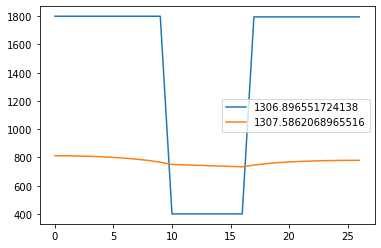

In [38]:
for i in range(10,12):
    plt.plot(plot_holder[i],label=value_array[i])
plt.legend()

In [ ]:
# KNOW THAT IT BREAKS AT ABOUT Qtotal = 13060.

In [6]:
pv, rho_l, mu_l, mu_v, sig, hfg, rho_v, cfluid, mw, rk = fluid_properties(800)
print(pv, rho_l, mu_l, mu_v, sig, hfg, rho_v, cfluid, mw, rk)

63718.805195575194 0.71990510272 0.001694257216000002 0.00017313087808 78.46999999373446 2042.4861593599999 3.9024282437556955e-05 37.07234688 39.1 1.64116


In [7]:
pv, rho_l, mu_l, mu_v, sig, hfg, rho_v, cfluid, mw, rk = fluid_properties(1073.15)
print(pv, rho_l, mu_l, mu_v, sig, hfg, rho_v, cfluid, mw, rk)

1422809.3367185015 0.654173862280846 0.001274224518578147 0.00020313992467478452 60.442099976633415 1904.3077952640297 0.0006773824883703088 29.38494181199639 39.1 1.60734403


In [ ]:
fmt = '{:{f}}  {:{f}}  {:{f}}  {:{f}}'
for i in range(total_mesh):
    print(fmt.format(distance[i],tempx[i],q1_array[i],dpv_total[i], f='8.2f'))

In [ ]:
plt.plot(distance,tempx)

In [ ]:
q1_array

In [ ]:
distance

In [ ]:
dpv_total

In [ ]:
pvap

In [ ]:
dpi_array

In [ ]:
dpv_array

In [ ]:
dpa_array

In [ ]:
dpl_array